## Classifying Cars
* Classifying the class of a car using a file called `vehicle_csv.csv` using **Stochastic Gradient Descent** (**SGD**)Classifier


In [116]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [117]:
cars = pd.read_csv("vehicle_csv.csv")
cars.head(15)

,COMPACTNESS,CIRCULARITY,DISTANCE_CIRCULARITY,RADIUS_RATIO,PR.AXIS_ASPECT_RATIO,MAX.LENGTH_ASPECT_RATIO,SCATTER_RATIO,ELONGATEDNESS,PR.AXIS_RECTANGULARITY,MAX.LENGTH_RECTANGULARITY,SCALED_VARIANCE_MAJOR,SCALED_VARIANCE_MINOR,SCALED_RADIUS_OF_GYRATION,SKEWNESS_ABOUT_MAJOR,SKEWNESS_ABOUT_MINOR,KURTOSIS_ABOUT_MAJOR,KURTOSIS_ABOUT_MINOR,HOLLOWS_RATIO,Class
0,95,48,83,178,72,10,162,42,20,159,176,379,184,70,6,16,187,197,van
1,91,41,84,141,57,9,149,45,19,143,170,330,158,72,9,14,189,199,van
2,104,50,106,209,66,10,207,32,23,158,223,635,220,73,14,9,188,196,saab
3,93,41,82,159,63,9,144,46,19,143,160,309,127,63,6,10,199,207,van
4,85,44,70,205,103,52,149,45,19,144,241,325,188,127,9,11,180,183,bus
5,107,57,106,172,50,6,255,26,28,169,280,957,264,85,5,9,181,183,bus
6,97,43,73,173,65,6,153,42,19,143,176,361,172,66,13,1,200,204,bus
7,90,43,66,157,65,9,137,48,18,146,162,281,164,67,3,3,193,202,van
8,86,34,62,140,61,7,122,54,17,127,141,223,112,64,2,14,200,208,van
9,93,44,98,197,62,11,183,36,22,146,202,505,152,64,4,14,195,204,saab


#### In the csv File we have FOUR clases which are
* OPEL, SAAB, BUS, VAN

In [118]:
cars["Class"].unique()

array(['van', 'saab', 'bus', 'opel'], dtype=object)

#### ATTRIBUTES
* 19 ATTRIBUTES

In [119]:
cars.columns

Index(['COMPACTNESS', 'CIRCULARITY', 'DISTANCE_CIRCULARITY', 'RADIUS_RATIO',
       'PR.AXIS_ASPECT_RATIO', 'MAX.LENGTH_ASPECT_RATIO', 'SCATTER_RATIO',
       'ELONGATEDNESS', 'PR.AXIS_RECTANGULARITY', 'MAX.LENGTH_RECTANGULARITY',
       'SCALED_VARIANCE_MAJOR', 'SCALED_VARIANCE_MINOR',
       'SCALED_RADIUS_OF_GYRATION', 'SKEWNESS_ABOUT_MAJOR',
       'SKEWNESS_ABOUT_MINOR', 'KURTOSIS_ABOUT_MAJOR', 'KURTOSIS_ABOUT_MINOR',
       'HOLLOWS_RATIO', 'Class'],
      dtype='object')

> We want to predict the class of the car based on 18 attributes which are:
    

    * COMPACTNESS
    * CIRCULARITY
    * DISTANCE_CIRCULARITY
    * RADIUS_RATIO
    * PR.AXIS_ASPECT_RATIO
    * MAX.LENGTH_ASPECT_RATIO
    * SCATTER_RATIO
    * ELONGATEDNESS
    * PR.AXIS_RECTANGULARITY
    * MAX.LENGTH_RECTANGULARITY
    * SCALED_VARIANCE_MAJOR
    * SCALED_VARIANCE_MINOR
    * SCALED_RADIUS_OF_GYRATION
    * SKEWNESS_ABOUT_MAJOR
    * SKEWNESS_ABOUT_MINOR
    * KURTOSIS_ABOUT_MAJOR
    * KURTOSIS_ABOUT_MINOR
    * HOLLOWS_RATIO

In [120]:
cars.columns[:-1]

Index(['COMPACTNESS', 'CIRCULARITY', 'DISTANCE_CIRCULARITY', 'RADIUS_RATIO',
       'PR.AXIS_ASPECT_RATIO', 'MAX.LENGTH_ASPECT_RATIO', 'SCATTER_RATIO',
       'ELONGATEDNESS', 'PR.AXIS_RECTANGULARITY', 'MAX.LENGTH_RECTANGULARITY',
       'SCALED_VARIANCE_MAJOR', 'SCALED_VARIANCE_MINOR',
       'SCALED_RADIUS_OF_GYRATION', 'SKEWNESS_ABOUT_MAJOR',
       'SKEWNESS_ABOUT_MINOR', 'KURTOSIS_ABOUT_MAJOR', 'KURTOSIS_ABOUT_MINOR',
       'HOLLOWS_RATIO'],
      dtype='object')

In [121]:
### Convert the classes to categorial data
pd.factorize(cars.Class)[0][:4]

array([0, 0, 1, 0], dtype=int64)

In [122]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [123]:
y_cars = pd.factorize(cars.Class)[0]

In [124]:

# X_cat=rs = cars[["COMPACTNESS", "CIRCULARITY", "DISTANCE_CIRCULARITY", ....]]
X_cars = np.array(cars[list(cars.columns[:-1])])
X_cars[:7]

array([[ 95,  48,  83, 178,  72,  10, 162,  42,  20, 159, 176, 379, 184,
         70,   6,  16, 187, 197],
       [ 91,  41,  84, 141,  57,   9, 149,  45,  19, 143, 170, 330, 158,
         72,   9,  14, 189, 199],
       [104,  50, 106, 209,  66,  10, 207,  32,  23, 158, 223, 635, 220,
         73,  14,   9, 188, 196],
       [ 93,  41,  82, 159,  63,   9, 144,  46,  19, 143, 160, 309, 127,
         63,   6,  10, 199, 207],
       [ 85,  44,  70, 205, 103,  52, 149,  45,  19, 144, 241, 325, 188,
        127,   9,  11, 180, 183],
       [107,  57, 106, 172,  50,   6, 255,  26,  28, 169, 280, 957, 264,
         85,   5,   9, 181, 183],
       [ 97,  43,  73, 173,  65,   6, 153,  42,  19, 143, 176, 361, 172,
         66,  13,   1, 200, 204]], dtype=int64)

In [125]:
y_cars

array([0, 0, 1, 0, 2, 2, 2, 0, 0, 1, 0, 1, 2, 0, 2, 3, 0, 2, 1, 3, 2, 0,
       2, 2, 1, 0, 1, 1, 2, 1, 0, 1, 3, 3, 3, 0, 2, 0, 1, 2, 3, 0, 0, 1,
       1, 0, 0, 2, 0, 1, 1, 1, 3, 2, 2, 0, 1, 0, 3, 0, 3, 3, 0, 2, 2, 3,
       2, 3, 0, 2, 3, 3, 3, 3, 0, 3, 1, 1, 2, 2, 2, 2, 0, 3, 2, 2, 0, 0,
       2, 3, 1, 3, 1, 0, 2, 3, 1, 2, 3, 2, 2, 0, 0, 0, 2, 1, 3, 3, 2, 2,
       0, 0, 3, 3, 0, 0, 3, 1, 2, 2, 1, 0, 0, 1, 0, 0, 2, 2, 0, 2, 1, 1,
       1, 0, 3, 0, 0, 0, 1, 0, 1, 2, 3, 2, 3, 3, 0, 2, 1, 0, 1, 2, 3, 1,
       0, 2, 3, 0, 1, 3, 3, 3, 1, 1, 3, 3, 1, 1, 2, 0, 3, 2, 0, 2, 0, 2,
       3, 2, 2, 0, 1, 3, 2, 1, 1, 2, 2, 3, 3, 3, 3, 0, 1, 2, 1, 2, 1, 2,
       2, 2, 0, 1, 3, 3, 0, 0, 3, 2, 2, 3, 3, 0, 2, 2, 3, 3, 1, 3, 2, 0,
       3, 0, 2, 2, 1, 0, 1, 0, 1, 1, 0, 1, 2, 1, 0, 0, 2, 2, 3, 2, 3, 3,
       2, 1, 0, 0, 2, 1, 3, 1, 0, 3, 0, 2, 0, 1, 1, 3, 1, 3, 1, 1, 0, 0,
       1, 2, 2, 1, 0, 0, 2, 1, 0, 0, 2, 2, 2, 3, 1, 2, 3, 2, 2, 1, 0, 1,
       2, 0, 3, 1, 0, 0, 2, 0, 2, 2, 2, 1, 1, 2, 1,

In [ ]:
### Splitting data into Testing and training

In [126]:
X_train, X_test, y_train, y_test = train_test_split(X_cars, y_cars, test_size=0.25, random_state=37)

In [127]:
X_train.shape

(634, 18)

In [128]:
y_train.shape

(634,)

In [129]:
scaler = preprocessing.StandardScaler().fit(X_train)
scaler

StandardScaler()

In [130]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [131]:
X_train[:2]

array([[ 1.10435706,  1.15248686,  1.31662479,  0.0162843 , -1.21954987,
        -0.35225696,  1.99165827, -1.64695316,  2.05004485,  0.82199311,
         2.07437151,  2.09438355,  2.31299079,  1.31459688, -0.7027996 ,
         1.12929276, -0.97304678, -1.57198006],
       [-1.87962852, -0.30143532, -0.78583467, -0.6641102 ,  0.41192717,
        -0.13500899, -0.66926207,  0.66884643, -0.62036872, -0.21284333,
        -0.63991478, -0.69484083, -0.20386387,  0.63300183, -1.10694921,
        -0.08796964, -1.29876571, -1.30413933]])

In [132]:
import seaborn as sns
colors = ["red", "green", "blue", "black"]

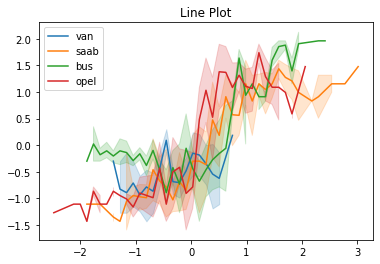

In [133]:
for i in range(len(colors)):
    xs = X_train[:,0][y_train== i]
    ys = X_train[:, 1][y_train == i]
    sns.lineplot(x=xs, y=ys)
plt.legend(cars["Class"].unique())
plt.title("Line Plot")
plt.show()

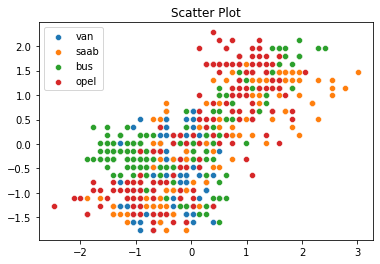

In [134]:
for i in range(len(colors)):
    xs = X_train[:,0][y_train== i]
    ys = X_train[:, 1][y_train == i]
    sns.scatterplot(x=xs, y=ys)
plt.legend(cars["Class"].unique())
plt.title("Scatter Plot")
plt.show()

In [135]:
from sklearn.linear_model import SGDClassifier
clf = SGDClassifier()

In [136]:
clf.fit(X_train , y_train)

SGDClassifier()

In [137]:
clf.coef_

array([[  9.9110698 ,  -4.25973972,  14.80069789,  -8.93138298,
          4.58513136,   0.11934908, -12.56009802,   4.50816766,
        -14.65215353,  28.32192165,  -4.81398455, -13.19921535,
        -13.01147423,  10.73608367,   1.41517349,  -4.67021924,
         -7.52344999,  15.72395134],
       [  2.08732312,  -3.76531198,  -1.37399609,   7.90467761,
         -6.01718888,  -1.53272201,   1.56264274,  -3.31123079,
          4.25630101,  -1.80280876,  -4.24467639,  -8.19685597,
          4.16429536,  -1.8610555 ,   1.10572699,   0.48596947,
         -8.38503474,   5.96705036],
       [ -1.0089124 ,   2.53535091,  -8.20621867, -34.6212628 ,
         22.24502344,  -2.33374787,   5.48758252, -22.14065673,
         -3.92908333,  -3.02416031,   4.4264962 ,   5.57436933,
          3.75169531,  -2.46964949,  -3.09208048,   2.87679337,
         17.54165585, -18.88794381],
       [ -3.56879883,   5.05114038,  -0.97852935,   7.23580451,
         -6.85339174,   0.57343228,   4.03769419,  -0.602

In [138]:
clf.intercept_

array([-29.06030494,  -4.55238628, -11.71698387,  -3.04120685])

### Making predictions with our model
* We want to predic what class the car is at index 0 in the dataframe
> If the model is correct the car should be a `van`

In [139]:
cars.iloc[0]

COMPACTNESS                   95
CIRCULARITY                   48
DISTANCE_CIRCULARITY          83
RADIUS_RATIO                 178
PR.AXIS_ASPECT_RATIO          72
MAX.LENGTH_ASPECT_RATIO       10
SCATTER_RATIO                162
ELONGATEDNESS                 42
PR.AXIS_RECTANGULARITY        20
MAX.LENGTH_RECTANGULARITY    159
SCALED_VARIANCE_MAJOR        176
SCALED_VARIANCE_MINOR        379
SCALED_RADIUS_OF_GYRATION    184
SKEWNESS_ABOUT_MAJOR          70
SKEWNESS_ABOUT_MINOR           6
KURTOSIS_ABOUT_MAJOR          16
KURTOSIS_ABOUT_MINOR         187
HOLLOWS_RATIO                197
Class                        van
Name: 0, dtype: object

In [140]:
_van = cars.iloc[0].values[:-1]
_van

array([95, 48, 83, 178, 72, 10, 162, 42, 20, 159, 176, 379, 184, 70, 6,
       16, 187, 197], dtype=object)

In [141]:
scaled_data = scaler.transform([_van])

prediction = clf.predict(scaled_data)
prediction ## Yes it is a van

array([0], dtype=int64)

In [142]:
_bus = cars.iloc[15].values[:-1]

In [143]:
scaled_data = scaler.transform([_bus])

prediction = clf.predict(scaled_data)
prediction

array([1], dtype=int64)

In [144]:
_bus = cars.iloc[2].values[:-1]
scaled_data = scaler.transform([_bus])

prediction = clf.predict(scaled_data)
prediction

array([1], dtype=int64)

In [146]:
_bus = cars.iloc[5].values[:-1]
scaled_data = scaler.transform([_bus])

prediction = clf.predict(scaled_data)
prediction

array([2], dtype=int64)

> Conclusion
* The model is not 100% accurate let's evaluate it

In [147]:
# Checking accuracy based on train data
from sklearn.metrics import accuracy_score
y_train_pred = clf.predict(X_train)

acc = accuracy_score(y_train, y_train_pred)
acc

0.7476340694006309

In [148]:
# Checking accuracy based on test data
y_predict = clf.predict(X_test)
acc = accuracy_score(y_test, y_predict)
acc

0.7641509433962265